# IT лекторий ITentika 2022

Автоматизация машинного обучения, LightAutoML SDK

In [15]:
# Common Import

import pandas as pd
import os


## Задача бинарной классификации

In [7]:
DATA_DIR = os.path.dirname('datasets/')
DATA_BINARY_TASK = os.path.join(DATA_DIR, 'binary')

In [11]:
income_df = pd.read_csv(f'{DATA_BINARY_TASK}/income_evaluation.csv')
income_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
INCOME_TARGET = ' income'

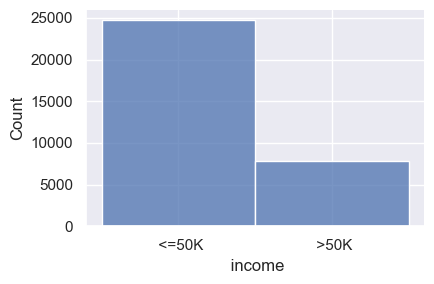

In [63]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.displot(income_df[INCOME_TARGET], height=3, aspect=1.5);

In [16]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    income_df.drop([INCOME_TARGET], axis=1),          # X
    income_df[INCOME_TARGET],                         # y
    random_state=123
    test_size=0.25
)

model = LogisticRegression()
model.fit(X_train, y_train)

In [39]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

sample = income_df.sample(500, random_state=123)

X_train, X_test, y_train, y_true = train_test_split(
    sample.drop([INCOME_TARGET], axis=1),          # X
    sample[INCOME_TARGET],                         # y
    test_size=0.25
)

automl = TabularAutoML(
    task = Task(
        name = 'binary',
        metric = lambda y_true, y_pred: f1_score(
            y_true, (y_pred > 0.5)*1)
        )
)

oof_pred = automl.fit_predict(
    X_train.assign(target=y_train),
    roles = {'target': 'target'}
)

test_pred = automl.predict(X_test)
y_pred_proba = test_pred.data[:, 0]
y_pred = (test_pred.data[:, 0] > 0.5)*1

print(
    classification_report(
        y_true.map({' <=50K': 0, ' >50K': 1}), 
        y_pred
    )
)

              precision    recall  f1-score   support

           0       0.88      0.98      0.92        94
           1       0.90      0.58      0.71        31

    accuracy                           0.88       125
   macro avg       0.89      0.78      0.82       125
weighted avg       0.88      0.88      0.87       125



## Regression Task

In [42]:
DATA_REG_TASK = os.path.join(DATA_DIR, 'regression')
housing_df = pd.read_csv(f'{DATA_REG_TASK}/housing_price.csv')
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [43]:
HOUSING_TARGET = 'median_house_value'

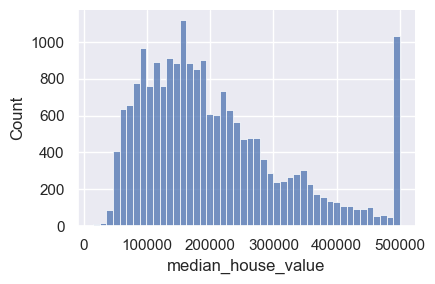

In [64]:
from matplotlib.pyplot import plot as plt
import seaborn as sns

sns.displot(housing_df[HOUSING_TARGET], height=3, aspect=1.5);

In [44]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [77]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

SAMPLES = 5_000

sample = housing_df.sample(SAMPLES, random_state=123)

X_train, X_test, y_train, y_true = train_test_split(
    sample.drop([HOUSING_TARGET], axis=1),          # X
    sample[HOUSING_TARGET],                         # y
    test_size=0.25
)

automl = TabularAutoML(
    task = Task(
        name = 'reg',
        metric = lambda y_true, y_pred: r2_score(y_true, y_pred)
    )
)

oof_pred = automl.fit_predict(
    X_train.assign(target=y_train),
    roles = {'target': 'target'}
)

test_pred = automl.predict(X_test)
y_pred = test_pred.data[:, 0]

print(
    'R2_Score:', r2_score(y_true, y_pred)
)

R2_Score: 0.8007301288884099
